In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Dataset Heart Risk.xlsx - Sheet1.csv')
df.head(10)

,P_ID,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartRisk
0,1211,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1212,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1213,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1214,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1215,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,1216,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,1217,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,1218,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1219,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1220,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [3]:
df.isnull().sum()

P_ID                 0
male                 0
age                  0
education           94
currentSmoker        0
cigsPerDay          25
BPMeds              46
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             46
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            345
HeartRisk            0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3698 entries, 0 to 3697
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   P_ID             3698 non-null   int64  
 1   male             3698 non-null   int64  
 2   age              3698 non-null   int64  
 3   education        3604 non-null   float64
 4   currentSmoker    3698 non-null   int64  
 5   cigsPerDay       3673 non-null   float64
 6   BPMeds           3652 non-null   float64
 7   prevalentStroke  3698 non-null   int64  
 8   prevalentHyp     3698 non-null   int64  
 9   diabetes         3698 non-null   int64  
 10  totChol          3652 non-null   float64
 11  sysBP            3698 non-null   float64
 12  diaBP            3698 non-null   float64
 13  BMI              3679 non-null   float64
 14  heartRate        3697 non-null   float64
 15  glucose          3353 non-null   float64
 16  HeartRisk        3698 non-null   int64  
dtypes: float64(9),

In [5]:
target=df.HeartRisk
df.drop(['HeartRisk','P_ID'],axis='columns',inplace=True)

In [6]:
df_num=pd.DataFrame()
df_cat=pd.DataFrame()

In [7]:
for i in df.columns:
    if df[i].dtype==object:
        df_cat[i]=df[i]
    else:
        df_num[i]=df[i]

In [8]:
def input_class(df,flag):
    if flag==0:
        df.fillna(df.mean(),axis=0,inplace=True)
    else:
        df.fillna(df.mode(),axis=0,inplace=True)
input_class(df_num,0)

In [9]:
cor=df_num.corr()
cor

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,1.000000,-0.032785,0.016387,0.198827,0.317426,-0.049999,-0.003783,0.008885,0.021330,-0.070436,-0.037775,0.063206,0.095366,-0.120658,0.015228
age,-0.032785,1.000000,-0.164907,-0.213234,-0.190618,0.111324,0.053681,0.296938,0.090974,0.250131,0.388454,0.199943,0.125897,-0.018917,0.116767
education,0.016387,-0.164907,1.000000,0.017395,0.003012,-0.007232,-0.042065,-0.085989,-0.026474,-0.010720,-0.134707,-0.063005,-0.125608,-0.052429,-0.030454
currentSmoker,0.198827,-0.213234,0.017395,1.000000,0.766208,-0.051305,-0.029098,-0.097329,-0.037065,-0.052833,-0.124257,-0.102923,-0.164612,0.066869,-0.049310
cigsPerDay,0.317426,-0.190618,0.003012,0.766208,1.000000,-0.042340,-0.026793,-0.058324,-0.028557,-0.027805,-0.081427,-0.048877,-0.079798,0.071238,-0.053169
BPMeds,-0.049999,0.111324,-0.007232,-0.051305,-0.042340,1.000000,0.076215,0.259289,0.049657,0.065612,0.242810,0.184810,0.086082,0.005429,0.031723
prevalentStroke,-0.003783,0.053681,-0.042065,-0.029098,-0.026793,0.076215,1.000000,0.063023,0.013293,0.001426,0.046495,0.029185,-0.015342,-0.013045,0.027299
prevalentHyp,0.008885,0.296938,-0.085989,-0.097329,-0.058324,0.259289,0.063023,1.000000,0.058654,0.154715,0.693641,0.612437,0.286529,0.147228,0.070613
diabetes,0.021330,0.090974,-0.026474,-0.037065,-0.028557,0.049657,0.013293,0.058654,1.000000,0.037410,0.098220,0.040301,0.069790,0.041416,0.568692
totChol,-0.070436,0.250131,-0.010720,-0.052833,-0.027805,0.065612,0.001426,0.154715,0.037410,1.000000,0.197706,0.155315,0.103041,0.094321,0.038114


<AxesSubplot:>

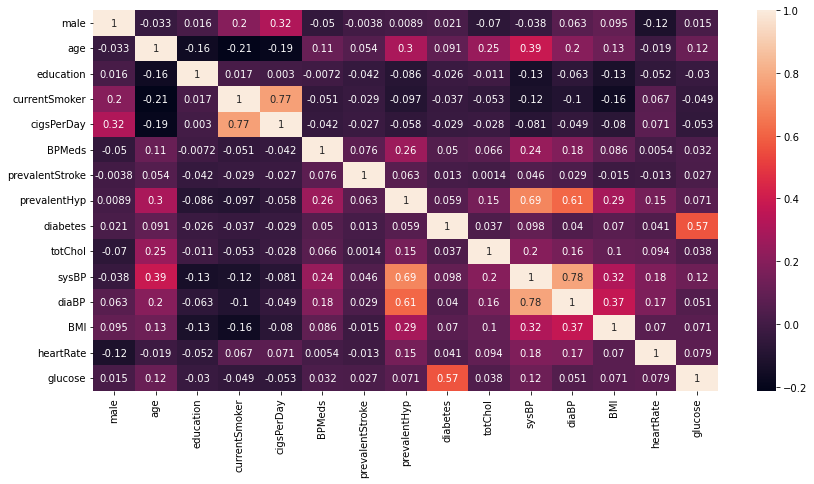

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
sns.heatmap(cor,annot=True)

In [15]:
def outliers(df,ft):
    q1=df[ft].quantile(0.25)
    q3=df[ft].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    
    lst=df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
    mean=df[ft].mean()
    for index in lst:
        df[ft].loc[index]=mean
        
    return lst

In [16]:
index_lst=[]
for i in df_num.columns:
    index_lst.extend(outliers(df_num,i))
print(index_lst,end=' ')

C:\Users\gaurav-PC\AppData\Local\Temp\ipykernel_8524\906677465.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ft].loc[index]=mean


[327, 721, 1054, 1452, 1468, 1488, 1849, 2709, 2710, 3008, 3673, 13, 42, 44, 49, 77, 154, 158, 161, 193, 245, 255, 299, 314, 333, 346, 374, 395, 421, 458, 471, 541, 590, 660, 665, 699, 723, 738, 750, 765, 769, 786, 795, 797, 864, 890, 976, 998, 1002, 1041, 1044, 1078, 1079, 1104, 1110, 1122, 1177, 1197, 1206, 1262, 1284, 1301, 1377, 1389, 1478, 1521, 1550, 1557, 1566, 1573, 1601, 1616, 1715, 1717, 1721, 1762, 1768, 1803, 1808, 1854, 1856, 1857, 1861, 1902, 1913, 1947, 1983, 1985, 1986, 1994, 1995, 2002, 2007, 2074, 2120, 2173, 2174, 2181, 2187, 2263, 2275, 2278, 2299, 2367, 2446, 2463, 2467, 2473, 2492, 2508, 2512, 2560, 2565, 2608, 2617, 2645, 2668, 2670, 2706, 2733, 2738, 2755, 2756, 2779, 2784, 2796, 2825, 2835, 2836, 2838, 2864, 2882, 2883, 2909, 2943, 2969, 2983, 2985, 3054, 3088, 3137, 3144, 3220, 3226, 3313, 3320, 3339, 3340, 3353, 3373, 3375, 3402, 3449, 3489, 3517, 3526, 3540, 3554, 3574, 3644, 3671, 3674, 3675, 255, 475, 646, 763, 1044, 1553, 1624, 1975, 2036, 2204, 2461, 247

In [17]:
def remove(df,index_lst):
    inde_lst=sorted(index_lst)
    df=df.drop(index_lst)
    return df

In [19]:
df_tr=remove(df_num,index_lst)
df_tr

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0.0,0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0.0,0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0.0,0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0.0,1,0.0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0.0,0,0.0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3692,1,50,2.0,0,0.0,0.0,0.0,1,0.0,252.0,114.0,75.0,30.89,60.0,69.0
3693,1,52,3.0,0,0.0,0.0,0.0,0,0.0,225.0,119.0,65.0,26.89,62.0,74.0
3694,0,63,1.0,0,0.0,0.0,0.0,0,0.0,235.0,125.0,79.0,24.38,96.0,83.0
3696,1,41,2.0,1,40.0,0.0,0.0,0,0.0,242.0,124.5,86.5,28.80,87.0,67.0


In [20]:
df_log=pd.DataFrame()
df_ex=pd.DataFrame()

In [21]:
for col in df_num.columns:
    df_log[col]=np.log(df_num[col])
df_log

C:\Users\gaurav-PC\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\gaurav-PC\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\gaurav-PC\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\gaurav-PC\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\gaurav-PC\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\gaurav-PC\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0.0,3.663562,1.386294,-inf,-inf,-inf,-inf,-inf,-inf,5.273000,4.663439,4.248495,3.294725,4.382027,4.343805
1,-inf,3.828641,0.693147,-inf,-inf,-inf,-inf,-inf,-inf,5.521461,4.795791,4.394449,3.357942,4.553877,4.330733
2,0.0,3.871201,0.000000,0.0,2.995732,-inf,-inf,-inf,-inf,5.501258,4.848116,4.382027,3.232384,4.317488,4.248495
3,-inf,4.110874,1.098612,0.0,3.401197,-inf,-inf,0.0,-inf,5.416100,5.010635,4.553877,3.352707,4.174387,4.634729
4,-inf,3.828641,1.098612,0.0,3.135494,-inf,-inf,-inf,-inf,5.652489,4.867534,4.430817,3.139833,4.442651,4.442651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,0.0,3.951244,1.098612,-inf,-inf,-inf,-inf,-inf,-inf,5.416100,4.779123,4.174387,3.291754,4.127134,4.304065
3694,-inf,4.143135,0.000000,-inf,-inf,-inf,-inf,-inf,-inf,5.459586,4.828314,4.369448,3.193763,4.564348,4.418841
3695,0.0,3.761200,1.098612,0.0,2.995732,-inf,-inf,-inf,-inf,5.480639,4.993828,4.477337,3.242592,4.174387,4.401782
3696,0.0,3.713572,0.693147,0.0,3.688879,-inf,-inf,-inf,-inf,5.488938,4.824306,4.460144,3.360375,4.465908,4.204693


In [22]:
for col in df_num.columns:
    df_ex[col]=np.exp(df_num[col])
df_ex

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,2.718282,8.659340e+16,54.598150,1.000000,1.000000e+00,1.0,1.0,1.000000,1.0,4.868823e+84,1.084464e+46,2.515439e+30,5.163238e+11,5.540622e+34,2.758513e+33
1,1.000000,9.496119e+19,7.389056,1.000000,1.000000e+00,1.0,1.0,1.000000,1.0,3.746455e+108,3.545131e+52,1.506097e+35,3.001100e+12,1.811239e+41,1.014800e+33
2,2.718282,7.016736e+20,2.718282,2.718282,4.851652e+08,1.0,1.0,1.000000,1.0,2.524341e+106,2.358014e+55,5.540622e+34,1.011631e+11,3.733242e+32,2.515439e+30
3,1.000000,3.104298e+26,20.085537,2.718282,1.068647e+13,1.0,1.0,2.718282,1.0,5.203055e+97,1.393710e+65,1.811239e+41,2.583071e+12,1.694889e+28,5.399228e+44
4,1.000000,9.496119e+19,20.085537,2.718282,9.744803e+09,1.0,1.0,1.000000,1.0,5.941927e+123,2.872650e+56,3.025077e+36,1.076967e+10,8.223013e+36,8.223013e+36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,2.718282,3.831008e+22,20.085537,1.000000,1.000000e+00,1.0,1.0,1.000000,1.0,5.203055e+97,4.797813e+51,1.694889e+28,4.766270e+11,8.438357e+26,1.373383e+32
3694,1.000000,2.293783e+27,2.718282,1.000000,1.000000e+00,1.0,1.0,1.000000,1.0,1.146049e+102,1.935576e+54,2.038281e+34,3.873464e+10,4.923458e+41,1.112864e+36
3695,2.718282,4.727839e+18,20.085537,2.718282,4.851652e+08,1.0,1.0,1.000000,1.0,1.700888e+104,1.144026e+64,1.651636e+38,1.312015e+11,1.694889e+28,2.733832e+35
3696,2.718282,6.398435e+17,7.389056,2.718282,2.353853e+17,1.0,1.0,1.000000,1.0,1.256796e+105,1.173986e+54,3.685299e+37,3.218704e+12,6.076030e+37,1.252363e+29


In [23]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [24]:
df_ex.replace([np.inf,-np.inf],0,inplace=True)
df_ex

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,2.718282,8.659340e+16,54.598150,1.000000,1.000000e+00,1.0,1.0,1.000000,1.0,4.868823e+84,1.084464e+46,2.515439e+30,5.163238e+11,5.540622e+34,2.758513e+33
1,1.000000,9.496119e+19,7.389056,1.000000,1.000000e+00,1.0,1.0,1.000000,1.0,3.746455e+108,3.545131e+52,1.506097e+35,3.001100e+12,1.811239e+41,1.014800e+33
2,2.718282,7.016736e+20,2.718282,2.718282,4.851652e+08,1.0,1.0,1.000000,1.0,2.524341e+106,2.358014e+55,5.540622e+34,1.011631e+11,3.733242e+32,2.515439e+30
3,1.000000,3.104298e+26,20.085537,2.718282,1.068647e+13,1.0,1.0,2.718282,1.0,5.203055e+97,1.393710e+65,1.811239e+41,2.583071e+12,1.694889e+28,5.399228e+44
4,1.000000,9.496119e+19,20.085537,2.718282,9.744803e+09,1.0,1.0,1.000000,1.0,5.941927e+123,2.872650e+56,3.025077e+36,1.076967e+10,8.223013e+36,8.223013e+36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,2.718282,3.831008e+22,20.085537,1.000000,1.000000e+00,1.0,1.0,1.000000,1.0,5.203055e+97,4.797813e+51,1.694889e+28,4.766270e+11,8.438357e+26,1.373383e+32
3694,1.000000,2.293783e+27,2.718282,1.000000,1.000000e+00,1.0,1.0,1.000000,1.0,1.146049e+102,1.935576e+54,2.038281e+34,3.873464e+10,4.923458e+41,1.112864e+36
3695,2.718282,4.727839e+18,20.085537,2.718282,4.851652e+08,1.0,1.0,1.000000,1.0,1.700888e+104,1.144026e+64,1.651636e+38,1.312015e+11,1.694889e+28,2.733832e+35
3696,2.718282,6.398435e+17,7.389056,2.718282,2.353853e+17,1.0,1.0,1.000000,1.0,1.256796e+105,1.173986e+54,3.685299e+37,3.218704e+12,6.076030e+37,1.252363e+29


In [25]:
df_tra=pd.DataFrame()
df_tra=scaler.fit_transform(df_ex)
df_tra

array([[ 1.16229162, -0.08418589,  2.63639086, ..., -0.15212492,
        -0.0622477 , -0.10821503],
       [-0.86036928, -0.08418588, -0.33636962, ..., -0.13846859,
        -0.05839989, -0.10821503],
       [ 1.16229162, -0.08418588, -0.63048866, ..., -0.15440664,
        -0.0622477 , -0.10821503],
       ...,
       [ 1.16229162, -0.08418588,  0.4631288 , ..., -0.15424155,
        -0.0622477 , -0.10821503],
       [ 1.16229162, -0.08418589, -0.33636962, ..., -0.13727263,
        -0.06224641, -0.10821503],
       [-0.86036928, -0.08418589, -0.33636962, ..., -0.15495056,
        -0.06217723, -0.10821503]])

In [26]:
pd.DataFrame(df_tra)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.162292,-0.084186,2.636391,-0.994606,-0.040693,-0.207039,-0.073741,-0.664194,-0.153382,-0.050214,-0.07369,-0.068399,-0.152125,-0.062248,-0.108215
1,-0.860369,-0.084186,-0.336370,-0.994606,-0.040693,-0.207039,-0.073741,-0.664194,-0.153382,-0.050214,-0.07369,-0.068399,-0.138469,-0.058400,-0.108215
2,1.162292,-0.084186,-0.630489,1.005423,-0.040693,-0.207039,-0.073741,-0.664194,-0.153382,-0.050214,-0.07369,-0.068399,-0.154407,-0.062248,-0.108215
3,-0.860369,-0.079774,0.463129,1.005423,-0.040693,-0.207039,-0.073741,1.505584,-0.153382,-0.050214,-0.07369,-0.068398,-0.140766,-0.062248,5.604718
4,-0.860369,-0.084186,0.463129,1.005423,-0.040693,-0.207039,-0.073741,-0.664194,-0.153382,-0.050214,-0.07369,-0.068399,-0.154903,-0.062248,-0.108215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,1.162292,-0.084185,0.463129,-0.994606,-0.040693,-0.207039,-0.073741,-0.664194,-0.153382,-0.050214,-0.07369,-0.068399,-0.152343,-0.062248,-0.108215
3694,-0.860369,-0.051587,-0.630489,-0.994606,-0.040693,-0.207039,-0.073741,-0.664194,-0.153382,-0.050214,-0.07369,-0.068399,-0.154750,-0.051788,-0.108215
3695,1.162292,-0.084186,0.463129,1.005423,-0.040693,-0.207039,-0.073741,-0.664194,-0.153382,-0.050214,-0.07369,-0.068399,-0.154242,-0.062248,-0.108215
3696,1.162292,-0.084186,-0.336370,1.005423,-0.039565,-0.207039,-0.073741,-0.664194,-0.153382,-0.050214,-0.07369,-0.068399,-0.137273,-0.062246,-0.108215


In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [30]:
x_train,x_test,y_train,y_test=train_test_split(df_num,target,test_size=0.3,random_state=10)

In [31]:
model1=LogisticRegression()

In [33]:
model1.fit(x_train,y_train)

C:\Users\gaurav-PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
model1.score(x_test,y_test)

0.8477477477477477